<a href="https://colab.research.google.com/github/ontenkutsenko/NLP_Airbnb_Delisting_Prediction/blob/main/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install langdetect

In [ ]:
#!pip install deep_translator

In [1]:
!pip install transformers torch langdetect deep_translator tqdm

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
import re
from deep_translator import GoogleTranslator
import time
from IPython.display import clear_output
from transformers import AutoTokenizer, AutoModel, DistilBertTokenizer, DistilBertModel, MarianMTModel, MarianTokenizer
import torch
from tqdm.notebook import tqdm

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!gdown 1Y63uPJCSWvlefU-HYpuVumaiqgjHjpb8

Downloading...
From (original): https://drive.google.com/uc?id=1Y63uPJCSWvlefU-HYpuVumaiqgjHjpb8
From (redirected): https://drive.google.com/uc?id=1Y63uPJCSWvlefU-HYpuVumaiqgjHjpb8&confirm=t&uuid=aed202ca-dbc7-4495-9cc6-d2fdeed2192b
To: /content/Project Corpora.zip
100% 55.4M/55.4M [00:00<00:00, 89.6MB/s]


In [4]:
!unzip '/content/Project Corpora.zip'

Archive:  /content/Project Corpora.zip
replace Project Corpora/test.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Project Corpora/test.xlsx  
  inflating: Project Corpora/test_reviews.xlsx  
  inflating: Project Corpora/train.xlsx  
  inflating: Project Corpora/train_reviews.xlsx  


In [5]:
!rm '/content/Project Corpora.zip'

In [6]:
df_train = pd.read_excel('/content/Project Corpora/train.xlsx')
df_train_reviews = pd.read_excel('/content/Project Corpora/train_reviews.xlsx')
df_test = pd.read_excel('/content/Project Corpora/test.xlsx')
df_test_reviews = pd.read_excel('/content/Project Corpora/test_reviews.xlsx')

In [ ]:
df_train

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0


In [ ]:
df_train_reviews.head(30)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
5,1,Our stay in Lisbon Tip Hostel was very good. T...
6,1,Close to shops in town and a comfortable place...
7,1,Young and friendly staff. Great location along...
8,1,The place is just off the Parque metro stop wh...
9,1,Had a nice stay at this hostel. The beds were ...


# Exploration

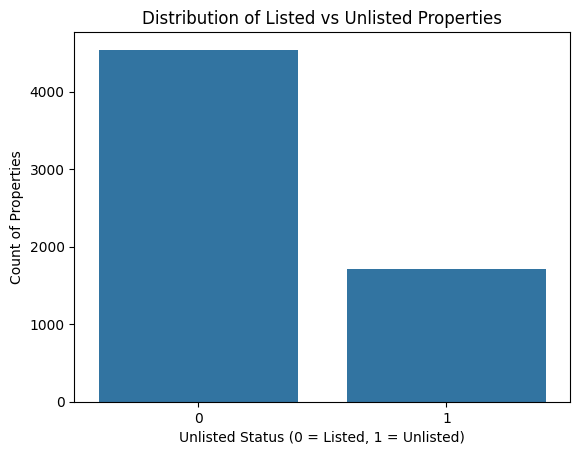

In [ ]:
# distribution of classes

sns.countplot(x='unlisted', data=df_train)
plt.title('Distribution of Listed vs Unlisted Properties')
plt.xlabel('Unlisted Status (0 = Listed, 1 = Unlisted)')
plt.ylabel('Count of Properties')
plt.show()

In [ ]:
# Let's create a wordcloud

def plot_word_cloud(text_series):
    text = ' '.join(text_series.dropna()).lower()
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Word Cloud for description


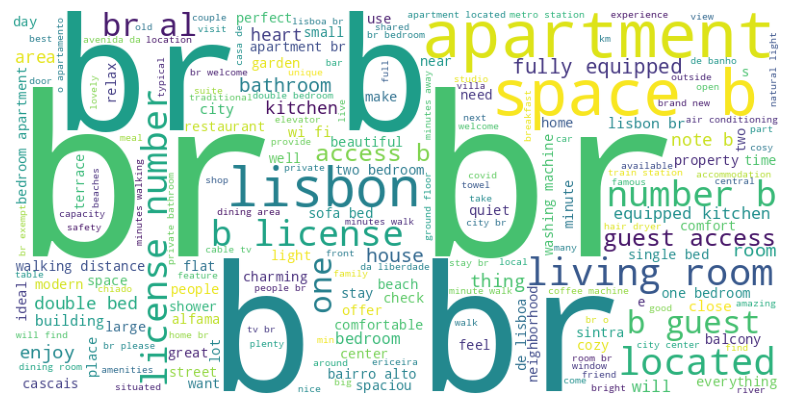

Word Cloud for host_about


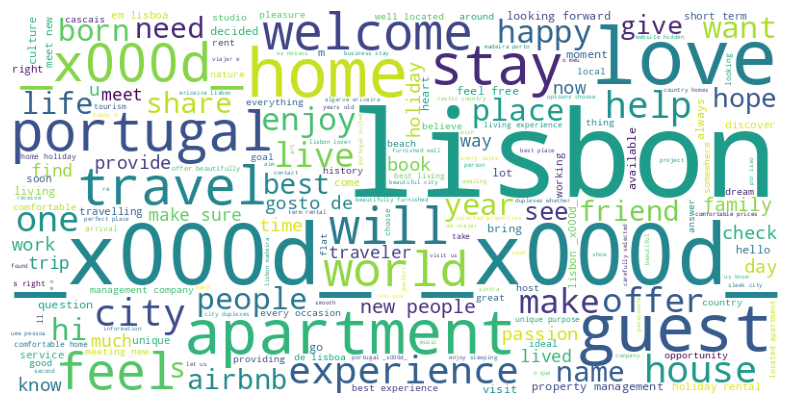

Word Cloud for comments


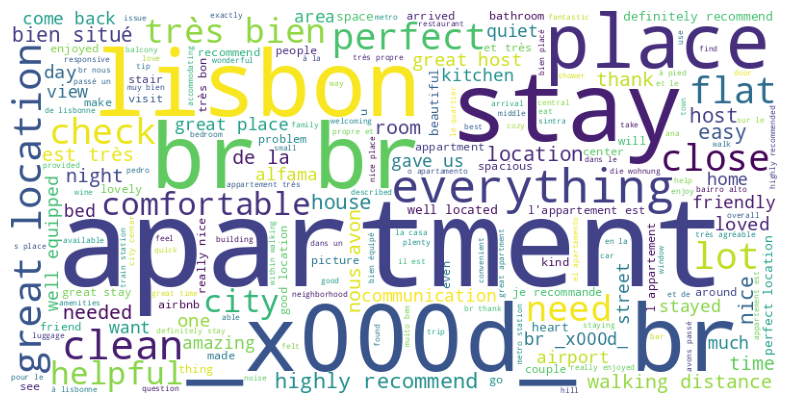

In [ ]:
# For df_train
for column in ['description', 'host_about']:
    print(f"Word Cloud for {column}")
    plot_word_cloud(df_train[column])

# For df_train_reviews
print("Word Cloud for comments")
plot_word_cloud(df_train_reviews['comments'])

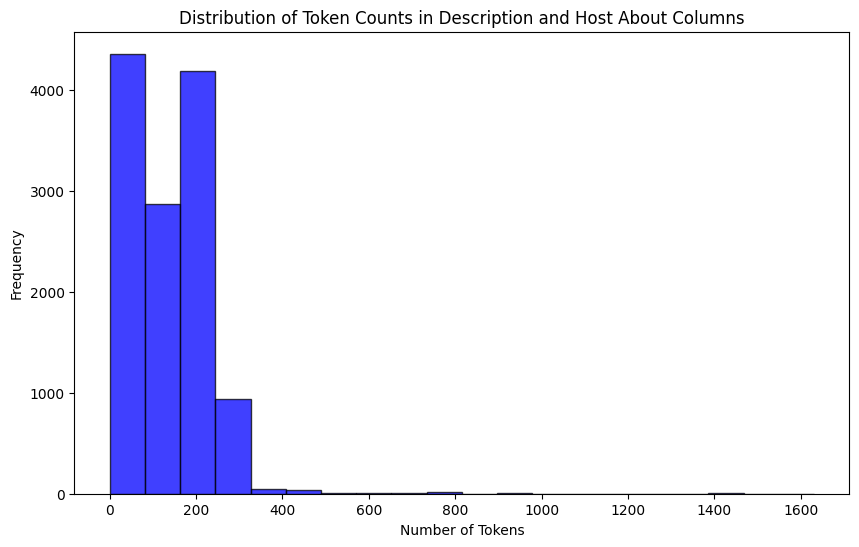

In [ ]:
def count_tokens(text):
    return len(word_tokenize(text))

# Get token counts for both columns
description_token_counts = df_train['description'].apply(count_tokens)
host_about_token_counts = df_train['host_about'].apply(count_tokens)

all_token_counts = list(description_token_counts) + list(host_about_token_counts)

# Create a histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(all_token_counts, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Token Counts in Description and Host About Columns')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing

In [ ]:
# Let's check examples where those unwanted words appear

def display_sentences_with_substring(df, column, substring, num_sentences=5):
    contains_substring = df[df[column].str.contains(substring, na=False, regex=False)]

    # Print examples
    print(f"Examples of sentences containing '{substring}' in {column}:")
    for example in contains_substring[column].head(num_sentences):
        print("-" * 80)
        print(example)
    print("-" * 80)

In [ ]:
# Display examples from 'description' containing "br"
display_sentences_with_substring(df_train, 'description', 'br')

# Display examples from 'comments' containing "_x000d"
display_sentences_with_substring(df_train_reviews, 'comments', 'x0')

Examples of sentences containing 'br' in description:
--------------------------------------------------------------------------------
This is a shared mixed room in our hostel, with shared bathroom.<br />We are located right across the street from subway station Parque, we are 5 min walk to Marques de Pombal square.<br /><br /><b>The space</b><br />We offer woman only rooms, mixed rooms, double rooms, twins rooms, single rooms and family rooms. Our kitchen is open to all guests and  There is a lounge for the guests to gather up, with cable TV. All rooms come standard equipped with comfortable beds, linen, blankets and reading lamps on side table. Free Wi-Fi access to all guests. Here you have no curfew, access is 24/7 and we have a late check out at 11:00, so you can sleep until late!<br /><br /><b>Guest access</b><br />All rooms have key-card access.
--------------------------------------------------------------------------------
Trafaria’s House is a cozy and familiar villa where yo

### Check for different languages

In [7]:
# check for languages

DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'

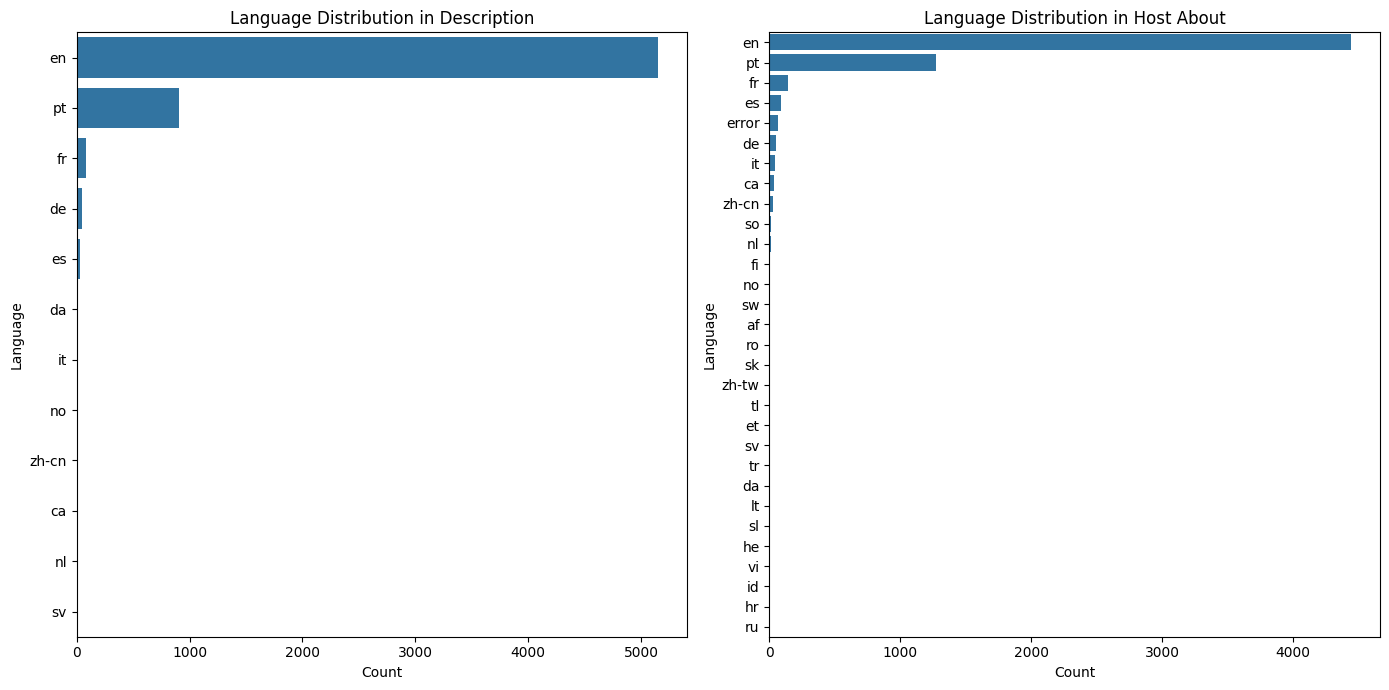

In [8]:
# check language in the two columns of df_train
df_train['lang_description'] = df_train['description'].apply(detect_language)
df_train['lang_host_about'] = df_train['host_about'].apply(detect_language)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(y='lang_description', data=df_train, order = df_train['lang_description'].value_counts().index)
plt.title('Language Distribution in Description')
plt.xlabel('Count')
plt.ylabel('Language')

plt.subplot(1, 2, 2)
sns.countplot(y='lang_host_about', data=df_train, order = df_train['lang_host_about'].value_counts().index)
plt.title('Language Distribution in Host About')
plt.xlabel('Count')
plt.ylabel('Language')

plt.tight_layout()
plt.show()

In [ ]:
# checking for rows where language of description and host_about don't match
mismatch_mask = df_train['lang_description'] != df_train['lang_host_about']
percentage_mismatch = (mismatch_mask.sum() / len(df_train)) * 100
percentage_mismatch

23.367477592829704

In [ ]:
## Let's do same for df_train_reviews
#df_train_reviews['lang_comments'] = df_train_reviews['comments'].apply(detect_language)

#sns.countplot(y='lang_comments', data=df_train, order = df_train_reviews['lang_comments'].value_counts().index)
#plt.title('Language Distribution in Comments')
#plt.xlabel('Count')
#plt.ylabel('Language')


# takes too long will run later

#### Let's try to translate to check how long it would take (with API calls)

In [ ]:
# def translate_to_english(text, lang, index, total):
#     start_time = time.time()
#     if lang != 'en':
#         try:
#             translated_text = GoogleTranslator(source='auto', target='en').translate(text)
#             elapsed_time = time.time() - start_time
#             clear_output(wait=True)
#             print(f"Translated row {index+1}/{total}: Took {elapsed_time:.2f} seconds")
#             return translated_text
#         except Exception as e:
#             clear_output(wait=True)
#             print(f"Failed to translate text in row {index+1}: {e}")
#             return text  # Return original text if translation fails
#     clear_output(wait=True)
#     print(f"Skipped translation for row {index+1}/{total} as it's already in English")
#     return text

In [ ]:
# total_rows = len(df_train)
# df_train['translated_description'] = df_train.apply(lambda row: translate_to_english(row['description'], row['lang_description'], row.name, total_rows), axis=1)

Skipped translation for row 6248/6248 as it's already in English


In [ ]:
# df_train['translated_description'].head(30)

0     This is a shared mixed room in our hostel, wit...
1     My space is close to Parque Eduardo VII, Salda...
2     Trafaria’s House is a cozy and familiar villa ...
3     Charming Apartment in Chiado, Between Largo do...
4     Nice apartment by the sea.<br /> 2 min. walkin...
5     IMPORTANT: In response to COVID-19, this prope...
6     This is my home that I rent out when I'm trave...
7     Find tranquility in this meticulously curated ...
8     Charming apartment with one bedroom with doubl...
9     Walk up original wooden stairs to the entrance...
10    Dear guests, I have the pleaser to receive you...
11    IMPORTANT: In response to COVID-19, this prope...
12    The owner welcomes guests personally, so that ...
13    Your luxurious and romantic home away from hom...
14    Spacious apartment located right in Cais do So...
15    Supremely well located in an historical buildi...
16    Set in a stunning seaside location, this luxur...
17    This house has easy stairs access. It has 

### Let's try translation with pretrained Seq2Seq model

In [9]:
translation_models = {
    'pt': 'Helsinki-NLP/opus-mt-ROMANCE-en',
    'fr': 'Helsinki-NLP/opus-mt-ROMANCE-en',
    'es': 'Helsinki-NLP/opus-mt-ROMANCE-en',
    'it': 'Helsinki-NLP/opus-mt-ROMANCE-en',
    'ca': 'Helsinki-NLP/opus-mt-ROMANCE-en',  # Catalan
    'gl': 'Helsinki-NLP/opus-mt-ROMANCE-en',  # Galician
    'ro': 'Helsinki-NLP/opus-mt-ROMANCE-en',  # Romanian
    'de': 'Helsinki-NLP/opus-mt-de-en',
    'nl': 'Helsinki-NLP/opus-mt-nl-en',
    'zh': 'Helsinki-NLP/opus-mt-zh-en',
    # maybe some more...
}

loaded_models = {}
for lang, model_name in translation_models.items():
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    loaded_models[lang] = (tokenizer, model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [10]:
def translate_texts(texts, src_lang):
    if src_lang == 'en' or src_lang == 'error' or src_lang not in loaded_models:
        return texts
    tokenizer, model = loaded_models[src_lang]
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True).to(device)
    translated_tokens = model.generate(**inputs)
    translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
    return translated_texts

In [11]:
def process_column(df, text_column, lang_column, batch_size=32):
    total_rows = df.shape[0]
    translated_texts = []

    for start_idx in tqdm(range(0, total_rows, batch_size), desc=f"Processing {text_column}"):
        end_idx = min(start_idx + batch_size, total_rows)
        texts = df[text_column].iloc[start_idx:end_idx].tolist()
        langs = df[lang_column].iloc[start_idx:end_idx].tolist()

        # Group texts by language
        lang_groups = {}
        for text, lang in zip(texts, langs):
            if lang not in lang_groups:
                lang_groups[lang] = []
            lang_groups[lang].append(text)

        batch_translated_texts = []
        for lang, group_texts in lang_groups.items():
            batch_translated_texts.extend(translate_texts(group_texts, lang))

        translated_texts.extend(batch_translated_texts)

        # Calculate and display progress percentage
        progress_percentage = ((start_idx + batch_size) / total_rows) * 100
        clear_output(wait=True)
        print(f"Progress for {text_column}: {progress_percentage:.2f}%")

    df[f'{text_column}_translated'] = translated_texts

In [ ]:
process_column(df_train, 'description', 'lang_description')

Progress for description: 29.19%


In [ ]:
process_column(df_train, 'host_about', 'lang_host_about')

#### Cleaning (Regular expressions, tags, tokenization, lemmatizing/stemming)

In [ ]:
# def preprocess_text(text, lang):
#     if not pd.isna(text):
#         text = re.sub(r'<br\s*/?>', ' ', text)  # Remove <br> and <br/>
#         text = re.sub(r'_x000D_', ' ', text)    # Remove _x000D_
#         text = re.sub(r'[^a-zA-Z\s]', ' ', text) # Remove non-alphabetic characters

#         text = text.lower()

#         tokens = word_tokenize(text)

#         # Language mapping from ISO to SnowballStemmer
#         lang_map = {
#             'en': 'english',
#             'de': 'german',
#             'nl': 'dutch',
#             'es': 'spanish',
#             'it': 'italian',
#             'pt': 'portuguese',
#             'fr': 'french'
#         }

#         if lang in lang_map:
#             # Set stopwords
#             stops = set(stopwords.words(lang_map[lang]))
#             # Initialize stemmer
#             stemmer = SnowballStemmer(lang_map[lang])
#             # Stemming and stopword removal
#             tokens = [stemmer.stem(word) for word in tokens if word not in stops and len(word) > 1]

#         return ' '.join(tokens)
#     else:
#         return None

In [ ]:
# supported_langs = ['en', 'de', 'nl', 'es', 'it', 'pt', 'fr']
# df_train = df_train[df_train['lang_description'].isin(supported_langs) & df_train['lang_host_about'].isin(supported_langs)] # remove other languages in training set since it is only very few rows

# df_train['processed_description'] = df_train.apply(lambda x: preprocess_text(x['description'], x['lang_description']), axis=1)
# df_train['processed_host_about'] = df_train.apply(lambda x: preprocess_text(x['host_about'], x['lang_host_about']), axis=1)


<ipython-input-19-c3f641f34bd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['processed_description'] = df_train.apply(lambda x: preprocess_text(x['description'], x['lang_description']), axis=1)
<ipython-input-19-c3f641f34bd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['processed_host_about'] = df_train.apply(lambda x: preprocess_text(x['host_about'], x['lang_host_about']), axis=1)


# First Model with mBERT and DistilBERT (no translation, only using description and host_about)

In [ ]:
def clean_text_mBERT(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special codes
    text = re.sub(r'_x000D_', '', text)
    # Strip any leading/trailing whitespace
    text = text.strip()
    return text

In [ ]:
df_train['description'] = df_train['description'].apply(clean_text_mBERT)
df_train['host_about'] = df_train['host_about'].apply(clean_text_mBERT)

In [ ]:
# instances for tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
# model = AutoModel.from_pretrained('bert-base-multilingual-cased')

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
model = DistilBertModel.from_pretrained('distilbert-base-multilingual-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

In [ ]:
def generate_embeddings(texts):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    embeddings = []

    for text in tqdm(texts, desc="Processing Texts"):
        encoded_input = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length').to(device)
        with torch.no_grad():
            output = model(**encoded_input)
        embedding = output.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
        embeddings.append(embedding)
        clear_output(wait=True)  # Clear the output after each text is processed

    return embeddings


In [ ]:
df_train['description_vector'] = generate_embeddings(df_train['description'].tolist())

Processing Texts:   0%|          | 0/6248 [00:00<?, ?it/s]

In [ ]:
df_train['host_about_vector'] = generate_embeddings(df_train['host_about'].tolist())

In [ ]:
df_train['combined_vector'] = df_train.apply(lambda row: np.concatenate([row['description_vector'], row['host_about_vector']]), axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/df_train.csv'
df.to_csv(file_path, index=False)

print(f'DataFrame is successfully saved at {file_path}')

